In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
%matplotlib inline

# 1. Чтение данных

Загружаем обработанные данные из прошлой лабораторной работы

In [106]:
data = pd.read_csv("googlepalystory_obr.csv")
data.shape

(9132, 40)

In [107]:
data['Type'] = data['Type'].astype('bool')
data['Type'] 

0       False
1       False
2       False
3       False
4       False
        ...  
9127    False
9128    False
9129    False
9130    False
9131    False
Name: Type, Length: 9132, dtype: bool

In [108]:
data.describe()

,Rating,Reviews,Size,Installs,Price,Content Rating,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
count,9132.000000,9.132000e+03,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,...,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000
mean,0.796356,1.184964e-03,0.033734,0.140198,0.016001,0.094357,0.006680,0.009198,0.005804,0.023544,...,0.039093,0.026172,0.037232,0.020696,0.024201,0.034275,0.084100,0.023106,0.015988,0.008213
std,0.126154,1.927887e-02,0.088280,0.315801,0.073400,0.232804,0.081461,0.095472,0.075965,0.151630,...,0.193828,0.159654,0.189339,0.142374,0.153680,0.181945,0.277553,0.150247,0.125435,0.090257
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,2.814800e-07,0.005691,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.825000,9.615101e-06,0.013937,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.875000,2.716634e-04,0.030197,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
data.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING',
       'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY', 'FINANCE',
       'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL',
       'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY',
       'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS',
       'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER'],
      dtype='object')

In [110]:
X = data.drop(['Type', 'Price'], axis=1)
y = data['Type']

# 2. Разбиение датасета на обучающую и тестовую выборки

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 45)
N_test, _ = X_test.shape

In [112]:
from sklearn.neural_network import MLPClassifier

# 3. Создание модели и ее обучение

In [113]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,),
                          solver = 'adam', 
                          activation = 'relu',
                          max_iter=1000,
                          random_state = 30)

In [114]:
%%time
mlp_model.fit(X_train, y_train)

Wall time: 6.31 s


MLPClassifier(max_iter=1000, random_state=30)

In [115]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [116]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.07293035479632064 0.07774857643451599


# 4. Подбор оптимального альфа

In [117]:
from sklearn.metrics import accuracy_score
alpha_arr = np.logspace(-3, 3, 10)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'adam', activation = 'relu', max_iter=1000, random_state = 20)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

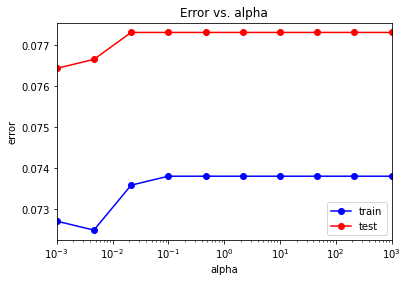

In [118]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

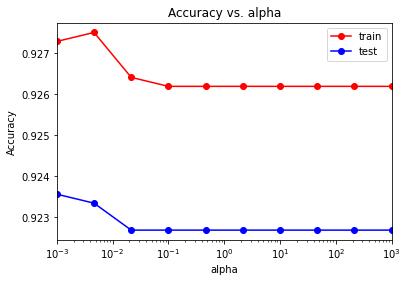

In [119]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

При малых значениях альфа видимо небольшое небольшое падение точности на тестовой выборке. 

Из анализа графиков точности от альфа видим, что не происходит переобучения, т.к. точность на тестовой выборке лучше чем на тренировочной, так же не наблюдается недообучения. При переходе от одного значеняи к другому видим малое измениние точности в зависимости от коэфициента.

In [120]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.07249233464739378 0.07643451598773543


In [121]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.001]


In [122]:
alpha_opt = alpha_opt[0]
alpha_opt

0.001

In [123]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'adam', activation = 'relu', max_iter=1000, random_state = 20)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.07271134472185721
0.07643451598773543


# 5. Подбор оптимального числа нейронов

In [124]:
neuron_arr = np.linspace(10, 100, 10).astype(int)
test_err = []
train_err = []
train_acc = []
test_acc = []

for neuron in neuron_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron,), 
                              solver = 'adam', activation = 'relu', max_iter=1000, random_state = 20)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

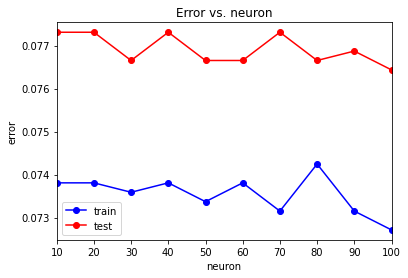

In [125]:
plt.plot(neuron_arr, train_err, 'b-o', label = 'train')
plt.plot(neuron_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(neuron_arr), np.max(neuron_arr)])
plt.title('Error vs. neuron')
plt.xlabel('neuron')
plt.ylabel('error')
plt.legend()

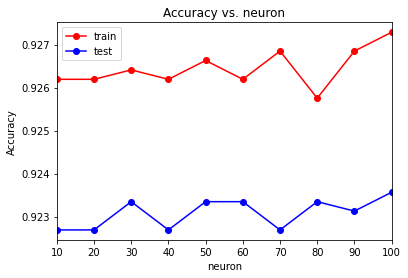

In [126]:
plt.plot(neuron_arr, train_acc, 'r-o', label = 'train')
plt.plot(neuron_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(neuron_arr), np.max(neuron_arr)])
plt.title('Accuracy vs. neuron')
plt.xlabel('neuron')
plt.ylabel('Accuracy')
plt.legend()

Аналогично, с при подборе оптимального количества нейронов не происходит переобучения или недообучения, а так же видим малое изменение точности. Оптимальным количеством нейронов для нашего случая являеется 20.

In [127]:
neuron_opt = neuron_arr[test_err == min_test_err]
print(neuron_opt)

[100]


In [128]:
neuron_opt = neuron_opt[0]

In [129]:
neuron_opt

100

In [130]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_opt,),
                          solver = 'adam', activation = 'relu', max_iter=1000, random_state = 20)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.07271134472185721
0.07643451598773543


# 6. Подбор оптимального числа нейронов и альфа

In [131]:
neuron_arr = np.linspace(10, 100, 5).astype(int)
alpha_arr = np.logspace(-3, 3, 5)
test_err = []
train_err = []
train_acc = []
test_acc = []
pars_arr = []

for neuron in neuron_arr:
    for alpha in alpha_arr:
        mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (neuron,), 
                                  solver = 'adam', activation = 'relu', max_iter=1000, random_state = 20)
        mlp_model.fit(X_train, y_train)

        y_train_pred = mlp_model.predict(X_train)
        y_test_pred = mlp_model.predict(X_test)
    
        train_err.append(np.mean(y_train != y_train_pred))
        test_err.append(np.mean(y_test != y_test_pred))
        train_acc.append(accuracy_score(y_train, y_train_pred))
        test_acc.append(accuracy_score(y_test, y_test_pred))
        pars_arr.append([neuron, alpha])
        
       

In [132]:
pars_arr

[[10, 0.001],
 [10, 0.03162277660168379],
 [10, 1.0],
 [10, 31.622776601683793],
 [10, 1000.0],
 [32, 0.001],
 [32, 0.03162277660168379],
 [32, 1.0],
 [32, 31.622776601683793],
 [32, 1000.0],
 [55, 0.001],
 [55, 0.03162277660168379],
 [55, 1.0],
 [55, 31.622776601683793],
 [55, 1000.0],
 [77, 0.001],
 [77, 0.03162277660168379],
 [77, 1.0],
 [77, 31.622776601683793],
 [77, 1000.0],
 [100, 0.001],
 [100, 0.03162277660168379],
 [100, 1.0],
 [100, 31.622776601683793],
 [100, 1000.0]]

In [133]:
test_err

[0.07731055628558914,
 0.07731055628558914,
 0.07731055628558914,
 0.07731055628558914,
 0.07731055628558914,
 0.07709154621112571,
 0.07731055628558914,
 0.07731055628558914,
 0.07731055628558914,
 0.07731055628558914,
 0.07665352606219886,
 0.07665352606219886,
 0.07731055628558914,
 0.07731055628558914,
 0.07731055628558914,
 0.07665352606219886,
 0.07709154621112571,
 0.07731055628558914,
 0.07731055628558914,
 0.07731055628558914,
 0.07643451598773543,
 0.07709154621112571,
 0.07731055628558914,
 0.07731055628558914,
 0.07731055628558914]

In [134]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.07271134472185721 0.07643451598773543


In [135]:
i, = np.where(test_err == min_test_err)
neuron_opt, alpha_opt = pars_arr[i[0]]
print(neuron_opt, alpha_opt)

100 0.001


In [136]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_opt,),
                          solver = 'adam', activation = 'relu', max_iter=1000, random_state = 20)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.07271134472185721
0.07643451598773543


# 7. Выводы
    При всех попытках подбора коэфициентов и количества нейронов получали малое изменение точности, следовательно, никакой явной зависимости точности от этих параметров(в нашем случаем можем сказать, что коэффициенты почти не влияют на точность). Так же не наблюдали переобучения или недообучения. Во всех рассмотренных случаях решение задачи классификации получалось с большой точностью.

In [137]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_test, y_test_pred))

[[4210    3]
 [ 346    7]]


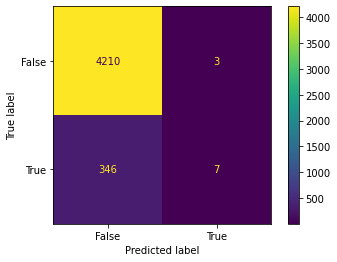

In [138]:
cm = confusion_matrix(y_test, y_test_pred, labels=mlp_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot()
plt.show()